# Machine Learning Project

## Introduction

The aim of this project is to predict the presence of heart disease using a dataset obtained from the UCL Machine Learning repository. The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/statlog+%28heart%29). 

*INSERT OUTLINE OF METHODOLOGY AFTER PROJECT* classifiers are KNN, DT, NB, RF

## Data Description

Our data consists of 270 instances with 13 descriptive features, and a target feature having two classes which indicate the presence or absence of heart disease. Hence, this is a binary classification problem. As is, our dataset contains no missing values.

The following explanation of the descriptive features is extracted from the dataset description on the [UCL website](https://archive.ics.uci.edu/ml/datasets/statlog+%28heart%29):
* age - **numerical**
* sex - **binary**
* chest pain type - **nominal**
* resting blood pressure - **numerical**
* serum cholestoral in mg/dl - **numerical**      
* fasting blood sugar > 120 mg/dl - **binary**
* resting electrocardiographic results - **nominal**
* maximum heart rate achieved - **numerical**
* exercise induced angina - **binary**
* oldpeak = ST depression induced by exercise relative to rest - **numerical**
* the slope of the peak exercise ST segment - **ordinal**
* number of major vessels (0-3) colored by flourosopy - **numerical**    
* thal - **nominal**

Each of the nominal features has been integer encoded, which is a miselading representation of the data and will be addressed in the processing stage. 

Time to import our dataset as well as any modules we will be using, and do some preliminary configuration.

In [1]:
import pandas as pd
import numpy as np

# for plotting
#!pip install --upgrade altair
#!pip install vega vega_datasets

# Ignore python warnings
import warnings
warnings.filterwarnings('ignore')

# set random state for reproducibility
random_seed = 999

# display all columns
pd.set_option('display.max_columns', None) 

# read in and configure data with column names
# col_names = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results', 'max_hr_achieved', 'exercise_induced_angina', 'oldpeak', 'slope_of_peak_exercise', 'no_of_major_vessels', 'thal', 'target']
# these names are abbreviated below for space
col_names = ['age', 'sex', 'cpt', 'rb', 'sc', 'fbs', 'rer', 'mha', 'eia', 'old', 'sope', 'nomv', 'thal', 'target'] 
data = pd.read_csv('heart.csv',names=col_names,header=None)

# separate target feature
target = data['target']
data.drop(columns=['target'],inplace=True)

Now that we have our dataset imported and our target feature separated we can have a brief look at our dataset using python.

In [2]:
print("----------")
print(f"Shape of the dataset is {data.shape} \n")
print("----------")
print(f"Each of the descriptive features have the following types:\n{data.dtypes}\n")
print("----------")
print(f"Each of the descriptive features have the following number of unique values:\n{data.nunique()}\n")
print("----------")
print(f"The dataset contains no missing values:\n{data.isna().sum()}\n")

----------
Shape of the dataset is (270, 13) 

----------
Each of the descriptive features have the following types:
age     float64
sex     float64
cpt     float64
rb      float64
sc      float64
fbs     float64
rer     float64
mha     float64
eia     float64
old     float64
sope    float64
nomv    float64
thal    float64
dtype: object

----------
Each of the descriptive features have the following number of unique values:
age      41
sex       2
cpt       4
rb       47
sc      144
fbs       2
rer       3
mha      90
eia       2
old      39
sope      3
nomv      4
thal      3
dtype: int64

----------
The dataset contains no missing values:
age     0
sex     0
cpt     0
rb      0
sc      0
fbs     0
rer     0
mha     0
eia     0
old     0
sope    0
nomv    0
thal    0
dtype: int64



## Data Preparation
<a id='dataprep'></a>
While our dataset comes to us fairly clean, there is still much data preparation to do before we can get to the business of predictive modelling.

First of all, we must integer encode the target feature. It currently holds the values (1) for the absence of heart disease, and (2) for the presence of heart disease. Since the presence is our postive feature, we wish to map this to (1) and the absence to (0).

In [3]:
# firstly we integer encode target feature 
print("Target before encoding: ",np.unique(target,return_counts=True))
encoded_target = np.where(target==1,0,1)
print("Target after encoding: ",np.unique(encoded_target,return_counts=True))

Target before encoding:  (array([1, 2]), array([150, 120]))
Target after encoding:  (array([0, 1]), array([150, 120]))


We now turn to our nominal features (chest pain type, resting electrocardiographic results, and thal) which have been integer encoded. As integer encoding assumes an ordering, we consider it bad practice to integer encode nominal features, so we will undo this encoding to repace it with a one-hot encoding scheme.

In [4]:
# output the value counts for variable 'cpt'
print(f"Before processing the variable \"cpt\" has the following value counts:\n{data['cpt'].value_counts()}\n")

# we then map each of them to the following categorical levels
cpt_mappings = {1.0 : 'cpt1', 2.0 : 'cpt2', 3.0 : 'cpt3', 4.0 : 'cpt4'}
data['cpt'].replace(cpt_mappings,inplace=True)

# output the result
print(f"After processing the variable \"cpt\" has the following value counts:\n{data['cpt'].value_counts()}\n")

# output the value counts for variable 'rer'
print(f"Before processing the variable \"rer\" has the following value counts:\n{data['rer'].value_counts()}\n")

# we then map each of them to the following categorical levels
rer_mappings = {0.0 : 'rer0', 1.0 : 'rer1', 2.0 : 'rer2'}
data['rer'].replace(rer_mappings,inplace=True)

# output the result
print(f"After processing the variable \"rer\" has the following value counts:\n{data['rer'].value_counts()}\n")

# output the value counts for variable 'thal'
print(f"Before processing the variable \"thal\" has the following value counts:\n{data['thal'].value_counts()}\n")

# we then map each of them to the following categorical levels
thal_mappings = {3.0 : 'thal3', 6.0 : 'thal6', 7.0 : 'thal7'}
data['thal'].replace(thal_mappings,inplace=True)

# output the result
print(f"After processing the variable \"thal\" has the following value counts:\n{data['thal'].value_counts()}\n")

Before processing the variable "cpt" has the following value counts:
4.0    129
3.0     79
2.0     42
1.0     20
Name: cpt, dtype: int64

After processing the variable "cpt" has the following value counts:
cpt4    129
cpt3     79
cpt2     42
cpt1     20
Name: cpt, dtype: int64

Before processing the variable "rer" has the following value counts:
2.0    137
0.0    131
1.0      2
Name: rer, dtype: int64

After processing the variable "rer" has the following value counts:
rer2    137
rer0    131
rer1      2
Name: rer, dtype: int64

Before processing the variable "thal" has the following value counts:
3.0    152
7.0    104
6.0     14
Name: thal, dtype: int64

After processing the variable "thal" has the following value counts:
thal3    152
thal7    104
thal6     14
Name: thal, dtype: int64



Now that we've undone the integer encoding, we're ready to apply one-hot encoding to these nominal variables.

In [5]:
# one-hot encode
data = pd.get_dummies(data)
# display transformed data
data.head()

,age,sex,rb,sc,fbs,mha,eia,old,sope,nomv,cpt_cpt1,cpt_cpt2,cpt_cpt3,cpt_cpt4,rer_rer0,rer_rer1,rer_rer2,thal_thal3,thal_thal6,thal_thal7
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,2.0,3.0,0,0,0,1,0,0,1,1,0,0
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,2.0,0.0,0,0,1,0,0,0,1,0,0,1
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,1.0,0.0,0,1,0,0,1,0,0,0,0,1
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,2.0,1.0,0,0,0,1,1,0,0,0,0,1
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1.0,0,1,0,0,0,0,1,1,0,0


Now that our descriptive features are encoded correctly we can scale our data.

In [6]:
from sklearn import preprocessing

# save a copy of the original data
data_copy = data.copy()
# perform scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = scaler.fit_transform(data)

Our data has now been processed and scaled and we're ready to move to the next section.

## Data Exploration & Visualisation

# Predictive Modelling

## Cross-Validation
To assess the performance of our models we will be using repeated stratified 10-fold cross-validation with 5 repetitions. Stratified cross-validation was selected to ensure the proportion of positive and negatives labels in the target is preserved in each repetition. - CHECK WHETHER THIS IS THE BEST WAY TO DO IT

In [7]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=5, 
                                    random_state=random_seed)

## Feature Selection
We will peform feature selection using random forest importance (RFI) on our dataset to determine whether an optimal subset of our descriptive features might give better performance. 

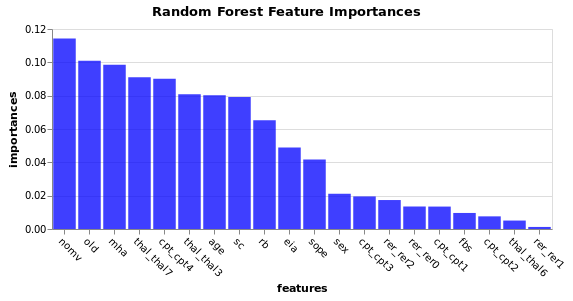

In [8]:
'''
CLEAN THIS UP JUST MAKING SURE IT RUNS PROPERLY ETC
'''
# for plotting
import altair as alt
alt.renderers.enable('notebook')

from sklearn import feature_selection as fs
from sklearn.ensemble import RandomForestClassifier

# intially we wish to look at all of our features

num_features = 20

model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(data, encoded_target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

# get all features in sorted order of importance
best_features_rfi = data_copy.columns[fs_indices_rfi].values

# get their importances
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]

# taken from SK2
def plot_imp(best_features, scores, method_name, x_label, y_label):
    
    df = pd.DataFrame({x_label : best_features, 
                       y_label : scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name,
                     ).mark_bar(opacity=0.75, 
                                color='blue').encode(
        alt.X(x_label, title=x_label, sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y(y_label, title=y_label)
    )
    
    return chart

# plot
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest Feature Importances','features','importances')

In the above graph we can see the importances of all of our descriptive features sorted in descreasing order of importance. Let us now measure the accuracy of a number of feature subsets to determine if one is optimal using a KNN classifier using the eulidean distance metric with n=5 neighbours.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

fs_knn = KNeighborsClassifier(n_neighbors=5)

num_features = [x for x in range(5,21)]

accuracy_scores = list()

for n in num_features:
    
    # subset data into the first n most important features
    subset = data[:, fs_indices_rfi[:n]]
    
    # assess accuracy and record
    cv_results_fs = cross_val_score(estimator=fs_knn,
                             X=subset,
                             y=encoded_target, 
                             cv=cv_method, 
                             scoring='accuracy')

    accuracy_scores.append(cv_results_fs.mean().round(3))
    
# display scores in sorted order
acc_df = pd.DataFrame({'num_features': num_features, 
                       'accuracy': accuracy_scores}).sort_values(by=['accuracy'])
acc_df

,num_features,accuracy
12,17,0.787
13,18,0.790
15,20,0.791
8,13,0.792
14,19,0.794
11,16,0.798
7,12,0.804
6,11,0.807
10,15,0.807
5,10,0.810


Above we see that using only the 6 (THIS VALUE WILL CHANGE) most important features yields us the greatest accuracy. However, due to constraints placed upon our dataset (i.e. a minimum of 7 descriptive features) we will select the first 9, which our tests indicate is practically the same as choosing 6 in terms of accuracy. We therefore subset our data accordingly before proceeding.

In [10]:
#data = data[:, fs_indices_rfi[:9]] # this value can change! be careful!
data.shape

(270, 20)

## Train-test Splitting
To fit and evaluate our models we require that our data be split into training and testing sets. Note that to preserve the proportion of positive and negative instances of our target across the training and test sets we set the stratify option to the target.

In [11]:
from sklearn.model_selection import train_test_split

d_train, d_test,t_train, t_test = train_test_split(data, encoded_target, 
                                                    test_size = 0.3, 
                                                    stratify = encoded_target,   
                                                    random_state=random_seed)

print(d_train.shape)
print(d_test.shape)

(189, 20)
(81, 20)


## Hyperparameter Tuning
In order to ensure that our machine learning models are optimal, it is necessary to perform hyperparameter tuning. Our chosen tuning method is grid search.